https://www.kaggle.com/datasets/danlessa/corrected-essays-with-scores-from-uol

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB #binary ise Bernolli veya Gauss kullanılır
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob , Word
from nltk.stem.snowball import SnowballStemmer

from langdetect import detect
%matplotlib inline

from nltk import word_tokenize

from wordcloud import WordCloud
from wordcloud import WordCloud , STOPWORDS

In [2]:
df = pd.read_csv("essays.csv")

In [3]:
df.head()

,Unnamed: 0,essay_text,essay_title,theme_text,theme_title,score_1,score_2,score_3,score_4,score_5,total_score
0,0,É indiscutível que o sistema educacional brasi...,Educação brasileira: conhecimento já!,Após as manifestações contra o contingenciame...,Universidade em crise: quem paga a conta?,120,0,80,80,80,360.0
1,1,A crise econômica sem precedentes pela qual o ...,A desigualdade no ensino brasileiro,Após as manifestações contra o contingenciame...,Universidade em crise: quem paga a conta?,160,160,120,160,120,720.0
2,2,"Recentemente, o Governo Federal anunciou um co...",O dilema do ensino superior,Após as manifestações contra o contingenciame...,Universidade em crise: quem paga a conta?,200,200,200,200,200,1000.0
3,3,"De fato, as discussões sobre o corte de verbas...",Educação é para todos,Após as manifestações contra o contingenciame...,Universidade em crise: quem paga a conta?,120,120,80,120,120,560.0
4,4,A crise econômica das universidades públicas t...,Desigualdade na educação,Após as manifestações contra o contingenciame...,Universidade em crise: quem paga a conta?,160,120,80,120,80,560.0


In [5]:
df = df[["essay_text","total_score"]]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   essay_text   694 non-null    object 
 1   total_score  642 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.0+ KB


In [8]:
df = df.dropna()

In [10]:
def clean_text(text):
    import re
    import string

    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' %re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[''""...]', '', text)
    text = re.sub('\n', '', text)
    return text

clean = lambda x: clean_text(x)
df["essay_text"] = df["essay_text"].apply(clean) 

In [41]:
df["lang"] = df["essay_text"].apply(detect)

In [42]:
df["lang"].value_counts()

# Portekizce

pt    641
Name: lang, dtype: int64

In [11]:
import nltk 
from nltk import word_tokenize
nltk.download("punkt")

from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oztur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [43]:
import nltk
from nltk.corpus import stopwords,words
nltk.download('stopwords')
stop_words = stopwords.words("Portuguese")  # Portekizce text
stop_words = [word.replace("\'", "") for word in stop_words] # stop wordleri kaldırdım
df["essay_text"] = df["essay_text"].apply(lambda row: " ".join([token for token in row.split(" ") if token not in stop_words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oztur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
import nltk
from nltk.stem import WordNetLemmatizer

df["essay_text"]= df["essay_text"].apply(lambda x : WordNetLemmatizer().lemmatize(x))

In [45]:
df[["polarity" , "subjectivity"]] = df["essay_text"].apply(lambda x : pd.Series(TextBlob(x).sentiment))

In [46]:
df.loc[df["subjectivity"]>0.7 , "Sentimentsubjectivity"] = "very subjective"
df.loc[df["subjectivity"]<0.2 , "Sentimentsubjectivity"] = "not subjective"
df["Sentimentsubjectivity"].fillna("less subjective" , inplace=True)

c:\Users\oztur\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sentimentsubjectivity', ylabel='count'>

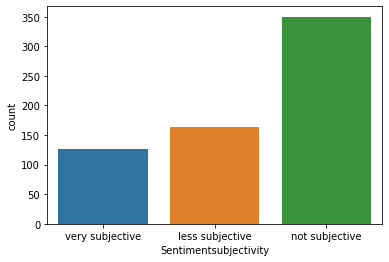

In [47]:
import seaborn as sns
sns.countplot(df["Sentimentsubjectivity"])

## Genel olarak öznel olmayacak şekilde essay yazılsa da bazı kişiler öznel cümleler ve kelimeler kullanmış

In [48]:
from PIL import Image

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                   mask =mask,
                   max_words=25000,
                   stopwords=stopwords)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Succesfully")
    path = "wc.png"
    display(Image.open(path))

Word Cloud Saved Succesfully


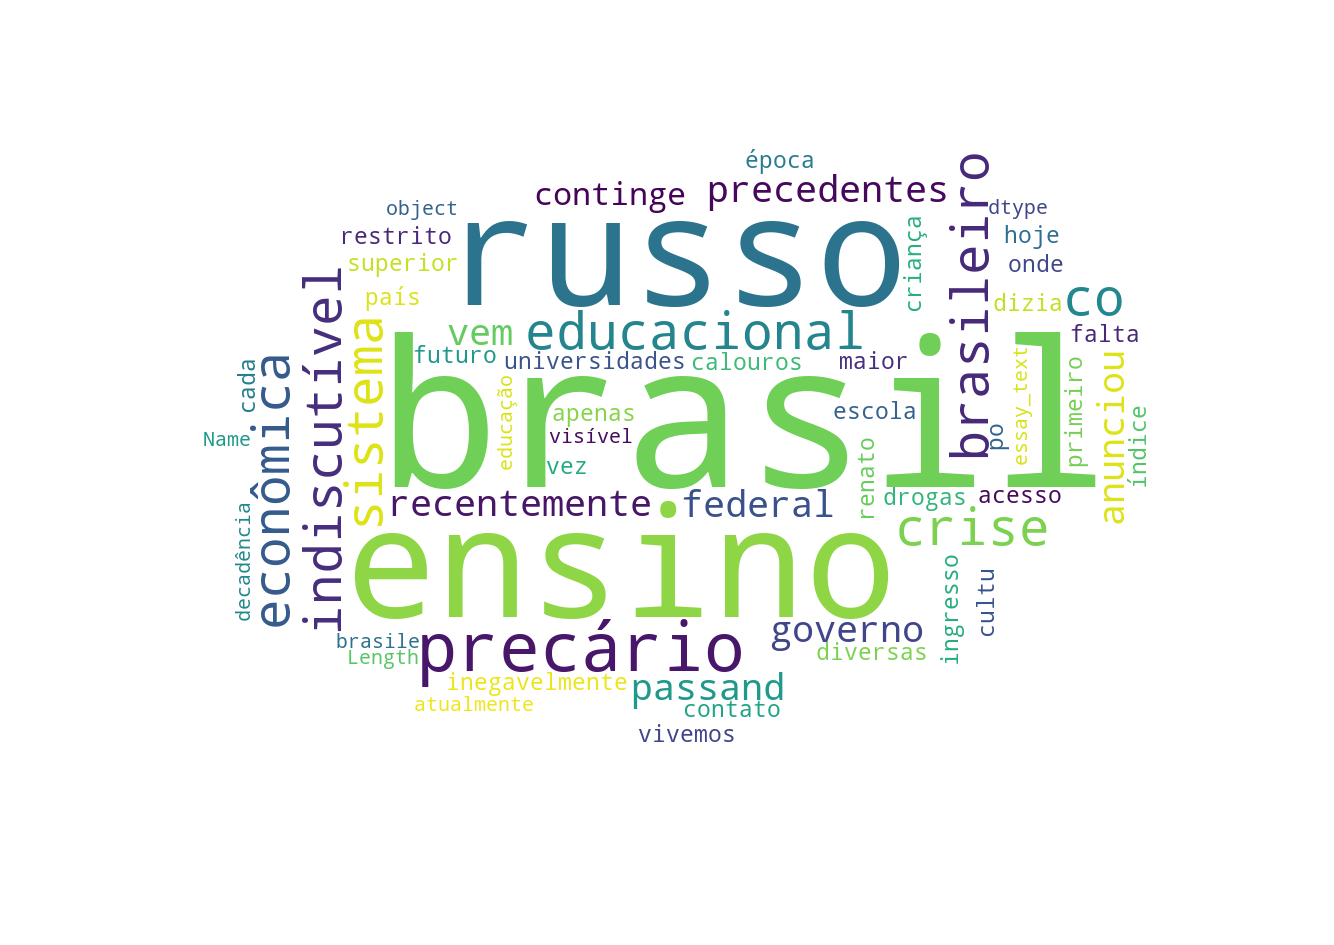

In [49]:
text1 = df[df["Sentimentsubjectivity"]=="very subjective"]
create_wordcloud(text1.essay_text)

Word Cloud Saved Succesfully


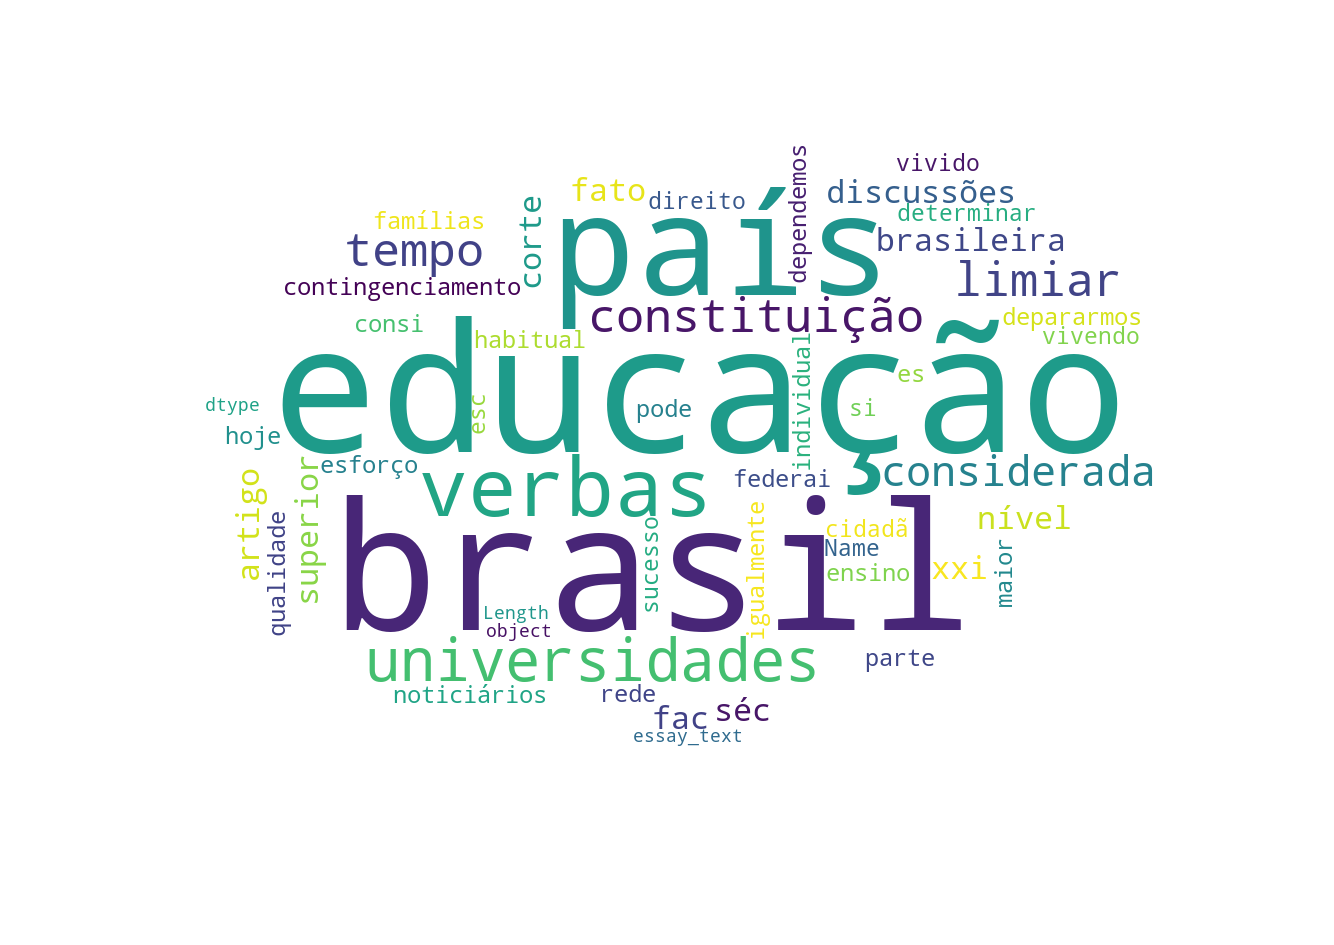

In [52]:
text1 = df[df["Sentimentsubjectivity"]=="less subjective"]
create_wordcloud(text1.essay_text)

Word Cloud Saved Succesfully


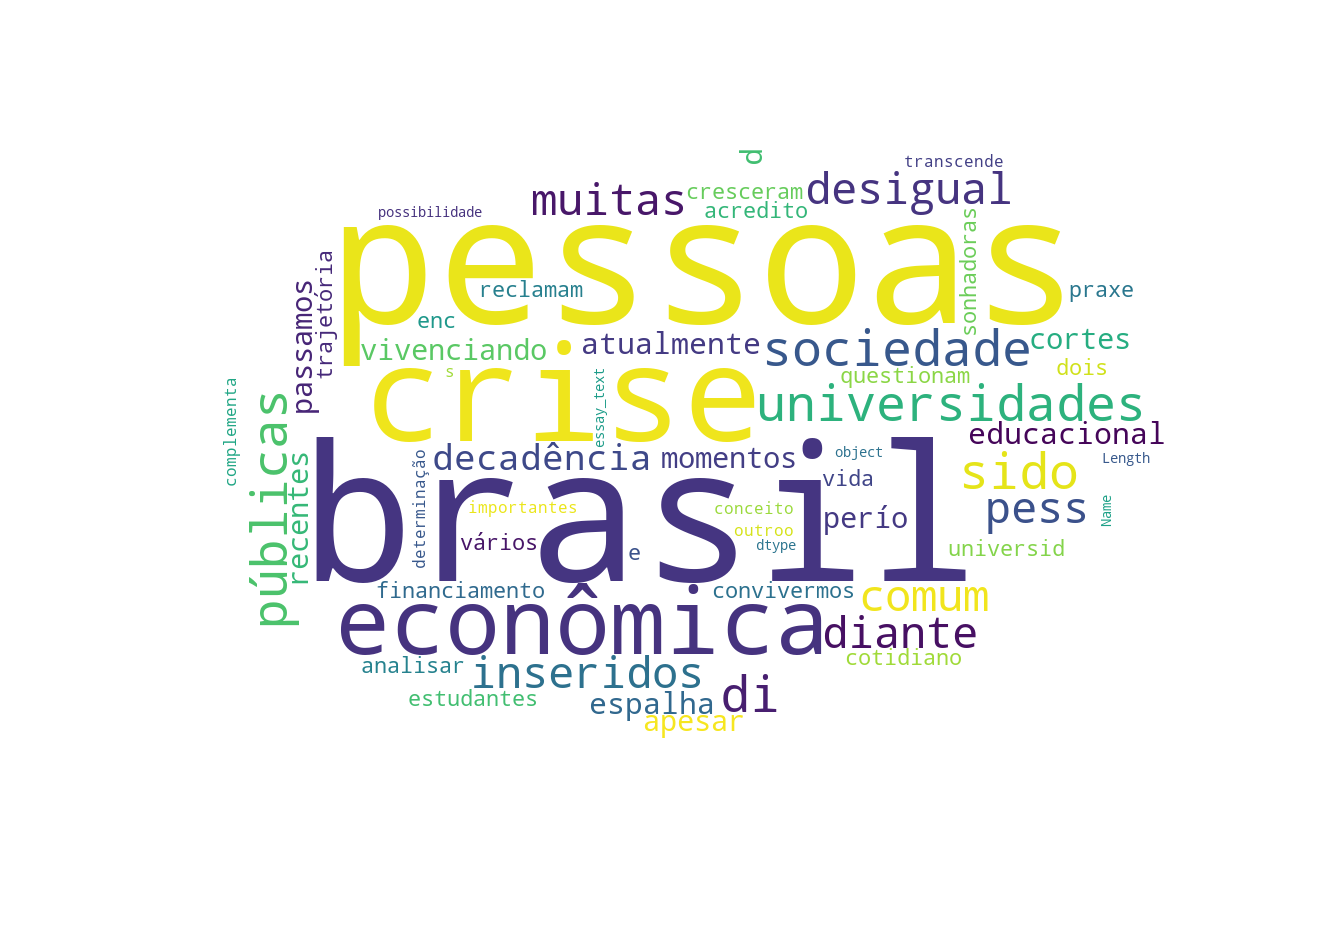

In [53]:
text1 = df[df["Sentimentsubjectivity"]=="not subjective"]
create_wordcloud(text1.essay_text)